In [1]:
import numpy as np
import os
import PIL
import tensorflow as tf

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Main directory that includes training and validation directories
#main_dir = '../Data/Obesebackup/'
#training_path = os.path.join (main_dir,'train')
#validation_path = os.path.join (main_dir,'val')
#test_path = os.path.join (main_dir,'test')

PATH = os.path.join('../Data/Obese/')

CHANNEL = 3 # Keep it 3 for colored images, make it 1 for grayscale
batch_size = 8 # Change it depending on your dataset size
# Image sizes depend on your preference and the model's requirements
IMG_HEIGHT = 224
IMG_WIDTH = 224

training_batches = ImageDataGenerator (
    rescale=1./255,
    rotation_range=20,  # Rotasi gambar dalam rentang 20 derajat
    width_shift_range=0.1,  # Perpindahan horizontal gambar
    height_shift_range=0.1,  # Perpindahan vertikal gambar
    horizontal_flip=True,  # Flip horizontal gambar
    fill_mode='nearest',  # Cara mengisi piksel kosong setelah augmentasi
    validation_split = 0.2 
).flow_from_directory (
    PATH,
    shuffle=True,
    target_size= (IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    subset = 'training',
    seed=123
)

val_test_batches = ImageDataGenerator (
    rescale=1./255,
    #rotation_range=20,  # Rotasi gambar dalam rentang 20 derajat
    #width_shift_range=0.2,  # Perpindahan horizontal gambar
    #height_shift_range=0.2,  # Perpindahan vertikal gambar
    #horizontal_flip=True,  # Flip horizontal gambar
    #fill_mode='nearest'  # Cara mengisi piksel kosong setelah augmentasi
    validation_split = 0.2
).flow_from_directory (
    PATH,
    shuffle=True,
    target_size= (IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    subset = 'validation',
    seed=123
)

Found 891 images belonging to 3 classes.
Found 221 images belonging to 3 classes.


In [3]:
training_batches.class_indices

{'normal': 0, 'obese1': 1, 'underweight': 2}

In [22]:
test_batches,val_batches = tf.split(val_test_batches,[100,121])

ValueError: Can't convert non-rectangular Python sequence to Tensor.

In [178]:
test_batches = ImageDataGenerator (
    rescale=1./255,
    #rotation_range=20,  # Rotasi gambar dalam rentang 20 derajat
    #width_shift_range=0.2,  # Perpindahan horizontal gambar
    #height_shift_range=0.2,  # Perpindahan vertikal gambar
    #horizontal_flip=True,  # Flip horizontal gambar
    #fill_mode='nearest',  # Cara mengisi piksel kosong setelah augmentasi
    validation_split = 0.2
).flow_from_directory (
    PATH,
    shuffle=True,
    target_size= (IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    subset = 'validation',
    seed = 321
)

Found 221 images belonging to 3 classes.


In [234]:
from tensorflow.keras.optimizers import Adam,RMSprop,Adagrad
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.mobilenet import MobileNet
# grader-required-cell

# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  base_model = MobileNet(weights='imagenet', include_top=False)
  base_model.trainable = True
  for layer in base_model.layers[:150]:
    layer.trainable = False
# ``
  x = base_model.output
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  x = tf.keras.layers.Dense(64, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)
  predictions = tf.keras.layers.Dense(3, activation='softmax')(x)
  model = Model(inputs=base_model.input, outputs=predictions)

  #model = tf.keras.models.Sequential([ 
  #  tf.keras.layers.Rescaling(1./255),
  #    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
  #    tf.keras.layers.MaxPooling2D(2,2),
  #    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  #    tf.keras.layers.MaxPooling2D(2,2),
  #    tf.keras.layers.MaxPooling2D(2,2),
  #    tf.keras.layers.Flatten(),
  #    tf.keras.layers.Dense(512,activation='relu'),
  #    tf.keras.layers.Dropout(0.5),
  #    tf.keras.layers.Dense(5,activation='softmax')
  #])

  
  model.compile(optimizer=Adam(learning_rate=1e-3),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model

In [263]:
model = create_model()

early_stopping = EarlyStopping(patience=15, verbose=1)
callbacks =[early_stopping]

history = model.fit(training_batches,
                    epochs=4,
                    verbose=1,
                    validation_data=validation_batches#,
                    #validation_steps=validation_steps
                    #callbacks=callbacks
                    )

Epoch 1/4
112/112 [==============================] - 31s 255ms/step - loss: 0.7873 - accuracy: 0.6779 - val_loss: 0.5491 - val_accuracy: 0.8235
Epoch 2/4
112/112 [==============================] - 15s 135ms/step - loss: 0.4921 - accuracy: 0.7868 - val_loss: 0.5442 - val_accuracy: 0.8235
Epoch 3/4
112/112 [==============================] - 17s 148ms/step - loss: 0.4432 - accuracy: 0.8204 - val_loss: 0.6602 - val_accuracy: 0.8235
Epoch 4/4
112/112 [==============================] - 17s 149ms/step - loss: 0.3942 - accuracy: 0.8204 - val_loss: 0.4729 - val_accuracy: 0.8688


In [58]:
import matplotlib.pyplot as plt
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training loss")
plt.plot(epochs, val_loss, 'b', "Validation loss")
plt.show()

TypeError: 'History' object is not subscriptable

In [265]:
model.evaluate(test_batches)A

28/28 [==============================] - 3s 88ms/step - loss: 0.4729 - accuracy: 0.8688


[0.47292232513427734, 0.8687782883644104]

In [227]:
test_batches.class_indices

{'normal': 0, 'obese1': 1, 'underweight': 2}

In [3]:
model = tf.keras.models.load_model('../Models/obese_models/8/')

In [4]:
class_name = ['normal','obese1','underweight']

In [2]:
from retinaface import RetinaFace

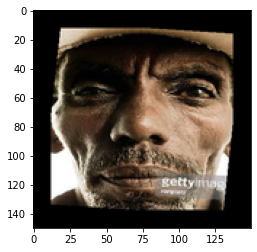

In [24]:
faces = RetinaFace.extract_faces('E:/download/3.jpg', align = True)
for face in faces:
  face = Image.fromarray(face)
  width, height = face.size
  # adjust the margin as you like
  margin = 0.1
  left = int(width * -margin)
  top = int(height * -margin)
  right = int(width * (1 + margin))
  bottom = int(height * (1 + margin))
  face = face.crop((left, top, right, bottom))
  face = face.resize((150, 150), Image.ANTIALIAS)
  plt.imshow(face)
  plt.show()

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img =RetinaFace.extract_faces('E:/download/14.jpeg',align=False)
#img2 = PIL.Image.open('E:/download/7.jpeg')
for face in img:
  face = Image.fromarray(face)
  #width, height = face.size
  ## adjust the margin as you like
  #margin = 0.00
  #left = int(width * -margin)
  #top = int(height * -margin)
  #right = int(width * (1 + margin))
  #bottom = int(height * (1 + margin))
#
  #face = img2.crop((left, top, right, bottom))
  face = face.resize((150, 150), Image.ANTIALIAS)

image = np.array(face)/255.0
image = image.reshape((1,150,150,3))
predict = class_name[np.argmax(model.predict(image))]
print(model.predict(image))
print(class_name)
print(f'status :{predict}')
plt.imshow(face)

ValueError: ('Input image file path (', 'E:/download/14.jpeg', ') does not exist.')

In [6]:
import matplotlib.pyplot as plt
import PIL
import numpy as np
img = PIL.Image.open('C:/Users/ribhanhadyan/Pictures/Camera Roll/WIN_20230604_20_04_37_Pro.jpg')
img = crop_image.crop_image(img)
img = img.resize((150,150))

image = np.array(img)/255.0
image = image.reshape((1,150,150,3))
predict = class_name[np.argmax(model.predict(image))]
print(model.predict(image))
print(class_name)
print(f'status :{predict}')
plt.imshow(img)

ModuleNotFoundError: No module named 'dlib'

In [7]:
!pip install dlib

  Using cached dlib-19.24.2.tar.gz (11.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build dlib


  error: subprocess-exited-with-error
  
  × Building wheel for dlib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [73 lines of output]
      running bdist_wheel
      running build
      running build_ext
      <string>:125: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
      Building extension for Python 3.8.16 (default, Mar  2 2023, 03:18:16) [MSC v.1916 64 bit (AMD64)]
      Invoking CMake setup: 'cmake C:\Users\ribhanhadyan\AppData\Local\Temp\pip-install-f1a0kixw\dlib_b1d0e9a19fde4d9b921e6befb888354f\tools\python -DCMAKE_LIBRARY_OUTPUT_DIRECTORY=C:\Users\ribhanhadyan\AppData\Local\Temp\pip-install-f1a0kixw\dlib_b1d0e9a19fde4d9b921e6befb888354f\build\lib.win-amd64-cpython-38 -DPYTHON_EXECUTABLE=c:\Users\ribhanhadyan\AppData\Local\Programs\Python\Python38\.conda\python.exe -DCMAKE_LIBRARY_OUTPUT_DIRECTORY_RELEASE=C:\Users\ribhanhadyan\AppData\Local\Temp\pip-install-f1a0kixw\dlib_b1d0e9a19fde4d9b921e6befb888354f\build

In [284]:
tf.keras.models.save_model(model,'../Models/obese_models/8/')

INFO:tensorflow:Assets written to: ../Models/obese_models/8/assets


INFO:tensorflow:Assets written to: ../Models/obese_models/8/assets


In [285]:
model.save('../Models/obese_models/8/model.h5')

In [147]:
prediction = model.predict(validation_batches)

30/30 [==============================] - 14s 294ms/step


In [164]:
model.evaluate(validation_batches)

30/30 [==============================] - 105s 3s/step - loss: 0.5886 - accuracy: 0.8125


[0.5886042714118958, 0.8125]

In [149]:
validation_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [155]:
predict = []
predict.append(int(np.argmax(i)) for i in prediction)

In [157]:
for i in prediction:
    predict.append(np.argmax(i))